#**Task - 03**
#**Boston House Price Predictions**
---

##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
import pandas as pd
dataset = pd.read_csv("housing.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##Dataset Properties

In [3]:
dataset.shape

(489, 4)

In [4]:
dataset.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [5]:
dataset.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [6]:
dataset.empty

False

In [7]:
dataset.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [8]:
dataset.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [9]:
dataset.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [10]:
dataset.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [11]:
print(X)

[[ 6.575  4.98  15.3  ]
 [ 6.421  9.14  17.8  ]
 [ 7.185  4.03  17.8  ]
 ...
 [ 6.976  5.64  21.   ]
 [ 6.794  6.48  21.   ]
 [ 6.03   7.88  21.   ]]


In [12]:
print(y)

[ 504000.  453600.  728700.  701400.  760200.  602700.  480900.  569100.
  346500.  396900.  315000.  396900.  455700.  428400.  382200.  417900.
  485100.  367500.  424200.  382200.  285600.  411600.  319200.  304500.
  327600.  291900.  348600.  310800.  386400.  441000.  266700.  304500.
  277200.  275100.  283500.  396900.  420000.  441000.  518700.  646800.
  732900.  558600.  531300.  518700.  445200.  405300.  420000.  348600.
  302400.  407400.  413700.  430500.  525000.  491400.  396900.  743400.
  518700.  663600.  489300.  411600.  392700.  336000.  466200.  525000.
  693000.  493500.  407400.  462000.  365400.  438900.  508200.  455700.
  478800.  491400.  506100.  449400.  420000.  436800.  445200.  426300.
  588000.  501900.  520800.  480900.  501900.  558600.  472500.  466200.
  495600.  602700.  474600.  462000.  480900.  525000.  432600.  596400.
  449400.  812700.  919800.  697200.  577500.  556500.  390600.  405300.
  422100.  409500.  409500.  428400.  415800.  4074

##Visualizing the data

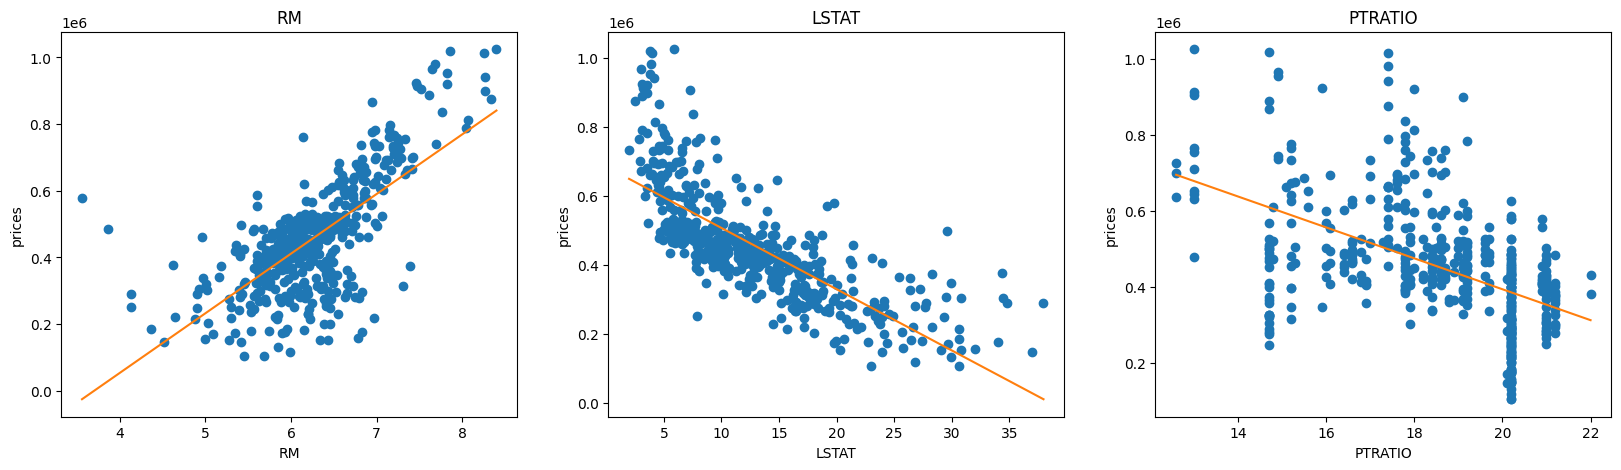

In [13]:
plt.figure(figsize=(20, 5))
features = dataset.drop('MEDV', axis = 1)

# i: index starts with 0
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    c = dataset[col]
    plt.plot(c, y, 'o')
    # Fitting regression line
    plt.plot(np.unique(c), np.poly1d(np.polyfit(c, y, 1))(np.unique(c)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

##Splitting the dataset into Training set and Test set


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
print(X_train)

[[ 6.209 13.22  20.2  ]
 [ 5.427 18.14  20.2  ]
 [ 5.349 19.77  20.2  ]
 ...
 [ 6.021 10.3   17.8  ]
 [ 6.03  18.8   17.9  ]
 [ 6.02  10.11  16.6  ]]


In [16]:
print(X_test)

[[ 5.834  8.47  21.   ]
 [ 6.842  6.9   13.   ]
 [ 5.403 26.82  14.7  ]
 [ 6.852 19.78  20.2  ]
 [ 6.417  8.81  17.8  ]
 [ 6.406 19.52  20.2  ]
 [ 4.903 29.29  14.7  ]
 [ 6.112 12.67  20.2  ]
 [ 6.163 11.34  18.   ]
 [ 5.965 13.83  21.   ]
 [ 6.223 21.78  20.2  ]
 [ 5.837 15.69  20.2  ]
 [ 6.041  7.7   19.6  ]
 [ 4.628 34.37  20.2  ]
 [ 6.727  9.42  20.9  ]
 [ 5.757 17.31  21.2  ]
 [ 6.279 11.97  18.7  ]
 [ 6.51   7.39  14.7  ]
 [ 5.807 16.03  18.6  ]
 [ 6.739  4.69  15.2  ]
 [ 7.327 11.25  13.   ]
 [ 7.135  4.45  17.   ]
 [ 4.519 36.98  20.2  ]
 [ 5.85   8.77  19.2  ]
 [ 5.569 15.1   19.2  ]
 [ 7.645  3.01  14.9  ]
 [ 7.333  7.79  13.   ]
 [ 7.61   3.11  14.7  ]
 [ 6.395 13.27  20.2  ]
 [ 6.019 12.92  19.2  ]
 [ 6.485 18.85  20.2  ]
 [ 5.889 15.71  15.2  ]
 [ 6.226 10.15  19.1  ]
 [ 6.943  4.59  14.7  ]
 [ 6.232 12.34  18.7  ]
 [ 8.337  2.47  17.4  ]
 [ 6.144  9.09  16.9  ]
 [ 5.627 22.88  20.2  ]
 [ 6.375  9.38  18.6  ]
 [ 6.393  5.19  16.6  ]
 [ 6.193 21.52  20.2  ]
 [ 6.377 20.45  

In [17]:
print(y_train)

[ 449400.  289800.  174300.  275100.  661500.  411600.  275100.  132300.
  357000.  483000.  285600.  493500.  701400.  405300.  338100.  743400.
  682500.  466200.  176400.  373800.  394800. 1014300.  636300.  228900.
  262500.  350700.  567000.  417900.  407400.  415800.  525000.  506100.
  348600.  474600.  760200.  485100.  602700.  432600.  380100.  438900.
  430500.  319200.  365400.  285600.  474600.  382200.  176400.  312900.
  693000.  453600.  560700.  501900.  436800.  478800.  327600.  252000.
  409500.  432600.  289800.  781200.  653100.  663600.  430500.  602700.
  455700.  409500.  499800.  409500.  499800.  525000.  497700.  281400.
  264600. 1024800.  602700.  117600.  483000.  525000.  905100.  399000.
  499800.  214200.  480900.  424200.  289800.  510300.  451500.  766500.
  510300.  369600.  466200.  312900.  407400.  273000.  392700.  294000.
  556500.  178500.  728700.  157500.  367500.  327600.  497700.  680400.
  266700.  388500.  520800.  405300.  296100.  1050

In [18]:
print(y_test)

[417900. 632100. 281400. 577500. 474600. 359100. 247800. 474600. 449400.
 411600. 214200. 214200. 428400. 375900. 577500. 327600. 420000. 489300.
 470400. 640500. 651000. 690900. 147000. 441000. 367500. 966000. 756000.
 888300. 455700. 445200. 323400. 455700. 430500. 867300. 445200. 875700.
 415800. 268800. 590100. 497700. 231000. 315000. 388500. 449400. 413700.
 352800. 453600. 306600. 898800. 514500. 743400. 474600. 600600. 304500.
 661500. 489300. 422100. 184800. 525000. 249900. 407400. 361200. 428400.
 392700. 428400. 472500. 258300. 550200. 346500. 199500. 302400. 611100.
 396900. 585900. 279300. 483000. 462000. 218400. 518700. 420000. 392700.
 980700. 455700. 514500. 480900. 520800. 485100. 525000. 390600. 569100.
 359100. 346500. 283500. 344400. 459900. 464100. 432600. 617400.]


##Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
print(X_train)

[[-0.03187316  0.04649813  0.78568433]
 [-1.24840058  0.74833711  0.78568433]
 [-1.36974219  0.98085693  0.78568433]
 ...
 [-0.32433755 -0.37004046 -0.36758671]
 [-0.3103366   0.84248624 -0.31953375]
 [-0.32589321 -0.39714399 -0.94422223]]


In [21]:
print(X_test)

[[-0.61524628 -0.63109032  1.17010801]
 [ 0.95286067 -0.85505113 -2.67412879]
 [-1.28573646  1.98654084 -1.85722847]
 [ 0.96841729  0.98228344  0.78568433]
 [ 0.29170446 -0.58258925 -0.36758671]
 [ 0.27459219  0.94519439  0.78568433]
 [-2.06356729  2.33888683 -1.85722847]
 [-0.18277234 -0.03195948  0.78568433]
 [-0.1034336  -0.22168425 -0.27148079]
 [-0.4114546   0.13351475  1.17010801]
 [-0.0100939   1.26758384  0.78568433]
 [-0.6105793   0.39884412  0.78568433]
 [-0.29322432 -0.74093097  0.49736657]
 [-2.49137424  3.06354985  0.78568433]
 [ 0.77395958 -0.49557263  1.12205505]
 [-0.73503223  0.62993744  1.26621393]
 [ 0.07702316 -0.13181462  0.06488993]
 [ 0.436381   -0.78515254 -1.85722847]
 [-0.65724915  0.44734519  0.01683697]
 [ 0.79262752 -1.17030807 -1.61696367]
 [ 1.70735657 -0.23452277 -2.67412879]
 [ 1.40866954 -1.20454412 -0.75201039]
 [-2.66094136  3.43586687  0.78568433]
 [-0.5903557  -0.58829526  0.30515473]
 [-1.02749662  0.3146805   0.30515473]
 [ 2.20205698 -1.40996041

##Training CatBoost on the Training set

In [22]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


In [23]:
from catboost import CatBoostRegressor
cat_reg = CatBoostRegressor()
cat_reg.fit(X_train, y_train)

Learning rate set to 0.035297
0:	learn: 160465.8088241	total: 46.7ms	remaining: 46.7s
1:	learn: 157001.3634560	total: 47.8ms	remaining: 23.9s
2:	learn: 153314.9989470	total: 48.9ms	remaining: 16.3s
3:	learn: 149773.9330656	total: 50.2ms	remaining: 12.5s
4:	learn: 146302.1160201	total: 52.3ms	remaining: 10.4s
5:	learn: 142804.8471958	total: 54.3ms	remaining: 8.99s
6:	learn: 139584.3343364	total: 56.1ms	remaining: 7.96s
7:	learn: 136542.4267431	total: 58.2ms	remaining: 7.22s
8:	learn: 133740.3577040	total: 60.2ms	remaining: 6.63s
9:	learn: 130629.3922282	total: 62ms	remaining: 6.14s
10:	learn: 127934.7756136	total: 63.9ms	remaining: 5.75s
11:	learn: 125233.9539716	total: 65.9ms	remaining: 5.42s
12:	learn: 122684.1415442	total: 67.9ms	remaining: 5.16s
13:	learn: 120192.4074860	total: 69.8ms	remaining: 4.91s
14:	learn: 117704.4601191	total: 71.7ms	remaining: 4.71s
15:	learn: 115213.9862062	total: 73.5ms	remaining: 4.52s
16:	learn: 112913.8736770	total: 75.5ms	remaining: 4.37s
17:	learn: 11

##Predicting the Test set

In [24]:
y_pred = cat_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[410536.84 417900.  ]
 [667513.22 632100.  ]
 [321043.76 281400.  ]
 [278405.23 577500.  ]
 [505930.01 474600.  ]
 [265590.04 359100.  ]
 [326665.82 247800.  ]
 [421923.63 474600.  ]
 [502565.7  449400.  ]
 [387300.88 411600.  ]
 [283107.13 214200.  ]
 [342569.05 214200.  ]
 [450045.88 428400.  ]
 [209992.63 375900.  ]
 [509542.79 577500.  ]
 [333879.93 327600.  ]
 [447805.21 420000.  ]
 [538626.89 489300.  ]
 [432500.85 470400.  ]
 [641626.64 640500.  ]
 [675871.42 651000.  ]
 [740515.46 690900.  ]
 [274607.18 147000.  ]
 [433498.71 441000.  ]
 [382080.91 367500.  ]
 [925661.09 966000.  ]
 [785722.9  756000.  ]
 [940433.86 888300.  ]
 [411657.79 455700.  ]
 [421833.18 445200.  ]
 [313962.52 323400.  ]
 [368192.2  455700.  ]
 [463520.48 430500.  ]
 [701724.81 867300.  ]
 [464017.51 445200.  ]
 [944872.21 875700.  ]
 [576825.57 415800.  ]
 [239174.32 268800.  ]
 [505682.3  590100.  ]
 [528224.95 497700.  ]
 [260347.11 231000.  ]
 [365204.95 315000.  ]
 [426032.26 388500.  ]
 [482448.59

##Evaluating the Model Performance

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7994376871648758

##Applying k-Fold Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = cat_reg, X = X_train, y = y_train, cv = 10)

Streaming output truncated to the last 5000 lines.
4:	learn: 147743.5110018	total: 4.34ms	remaining: 864ms
5:	learn: 144596.5514022	total: 5.32ms	remaining: 881ms
6:	learn: 141389.5395549	total: 6.25ms	remaining: 887ms
7:	learn: 138214.8604659	total: 7.17ms	remaining: 888ms
8:	learn: 135497.6911494	total: 8.1ms	remaining: 892ms
9:	learn: 132491.5072909	total: 9.01ms	remaining: 892ms
10:	learn: 129676.2608143	total: 9.92ms	remaining: 892ms
11:	learn: 126989.4740394	total: 10.8ms	remaining: 887ms
12:	learn: 124510.1817536	total: 11.7ms	remaining: 890ms
13:	learn: 121749.5386645	total: 12.6ms	remaining: 885ms
14:	learn: 119250.4580115	total: 13.4ms	remaining: 883ms
15:	learn: 116763.8573470	total: 14.3ms	remaining: 882ms
16:	learn: 114397.1279248	total: 15.2ms	remaining: 881ms
17:	learn: 112120.8811494	total: 16.1ms	remaining: 876ms
18:	learn: 110266.2882494	total: 16.9ms	remaining: 875ms
19:	learn: 108213.9798856	total: 17.8ms	remaining: 873ms
20:	learn: 106451.4243142	total: 18.7ms	rema

In [27]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.41 %
Standard Deviation: 6.82 %
